<a href="https://colab.research.google.com/github/AndreTeixeir/hackathon-one-sentiment-api/blob/main/datascience/Hackathon_One_Nb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <font color='orange'> **SentimentAPI — Análise de Sentimentos de Avaliações**

- <font color='red'> **Notebook 1  – Exploração e Preparação do DataSet**

## Projeto desenvolvido no Hackathon ONE

**Objetivo:**  
Construir um modelo de Machine Learning capaz de classificar o sentimento
(positivo / negativo / neutro) de avaliações textuais, integrável a uma API.

**Equipe de Data Science:**  
- Brena Stephany  
- Eiky Albuquerque
- Leticia Ferreira

**Modelo:** TF-IDF + Logistic Regression  

# <font color='blue'>**Importação de Bibliotecas**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

!pip install nltk

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report)

import joblib

# <font color='blue'>**Extração dos Dados**

In [ ]:
url = "https://raw.githubusercontent.com/AndreTeixeir/hackathon-one-sentiment-api/refs/heads/main/datascience/hopi_hari%20(1).csv"
df = pd.read_csv(url, sep=';')
df.head()


,comentario,nota,data
0,Filas de mais de 3 horas nos brinquedos.Filas ...,1.0,mar de 2023
1,"Parque lotado, fila da Montezum demorou mais d...",3.0,mar de 2023
2,"Muito ruim, caiu na qualidade. Muito demorado....",1.0,mar de 2023
3,"O parque atende a diversas faixa etária, fomos...",4.0,fev de 2023
4,DecadenteSó vá ao parque se:a) Você poder perd...,2.0,fev de 2023


# <font color='blue'>**Preparação dos Dados (Data Cleaning)**

### <font color='whitblue'> **Analisando o DataSet**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4044 entries, 0 to 4043
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   comentario  4044 non-null   object 
 1   nota        4044 non-null   float64
 2   data        4044 non-null   object 
dtypes: float64(1), object(2)
memory usage: 94.9+ KB


In [ ]:
df.isnull().sum()

,0
comentario,0
nota,0
data,0


In [ ]:
df.shape

(4044, 3)

In [ ]:
print(df['comentario'][0])

Filas de mais de 3 horas nos brinquedos.Filas de mais de 1 hora para comprar água.Sem estrutura.Chegamos na abertura do parque conseguimos ir em 2 brinquedos.Sem organização nas filas.Sem funcionários preparadosBrinquedos ok, mas nada demais.


O dataset apresenta 3 colunas, 4044 linhas e nenhum valor nulo.


### <font color='whitblue'> **Tamanho dos comentários (número de caracteres)**

In [ ]:
df['tamanho_texto'] = df['comentario'].apply(len)

df['tamanho_texto'].describe()


,tamanho_texto
count,4044.000000
mean,431.837290
std,462.287227
min,61.000000
25%,181.000000
50%,293.000000
75%,513.000000
max,8708.000000


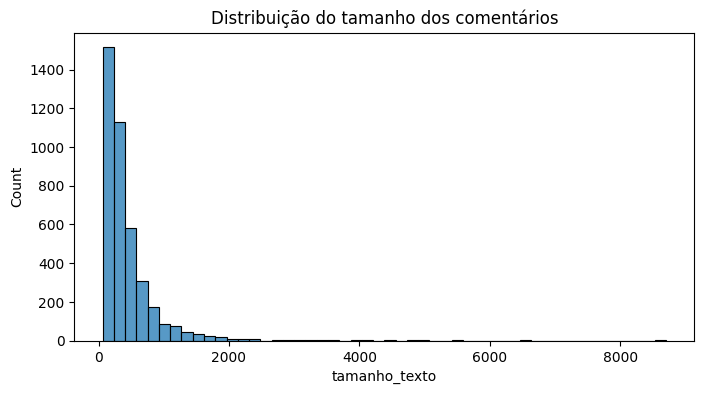

In [ ]:
plt.figure(figsize=(8,4))
sns.histplot(df['tamanho_texto'], bins=50)
plt.title("Distribuição do tamanho dos comentários")
plt.show()

### <font color='whitblue'> **Palavras mais frequentes**

In [ ]:
from collections import Counter
import re

texto_unido = " ".join(df['comentario'].str.lower())
palavras = re.findall(r'\b\w+\b', texto_unido)

contagem = Counter(palavras)
contagem.most_common(20)


[('e', 9813),
 ('de', 9245),
 ('o', 8839),
 ('a', 7402),
 ('que', 7355),
 ('parque', 5899),
 ('para', 4537),
 ('não', 4471),
 ('é', 3926),
 ('com', 3879),
 ('um', 3738),
 ('em', 3726),
 ('brinquedos', 3570),
 ('do', 3283),
 ('no', 3066),
 ('muito', 3051),
 ('os', 2640),
 ('as', 2465),
 ('mais', 2403),
 ('uma', 2330)]

In [ ]:
def limpar_texto(texto):
    """
    Função para limpar e normalizar o texto
    """
    texto = texto.lower()
    texto = re.sub(r'[^a-záàâãéèêíïóôõöúçñ\s]', '', texto)
    texto = re.sub(r'\s+', ' ', texto).strip()
    return texto

In [ ]:
  df['comentario'] = df['comentario'].apply(limpar_texto)

# <font color='blue'>**Criação da Variável Alvo (Label)**

Pre-Processamento

### <font color='whitblue'> **Classificação de Sentimentos**

<font color='red'> **Regra de rotulagem** (decisão da equipe de DS do projeto)

✔️ Para regressão logística binária

Regra escolhida:

* Positivo (1) → nota ≥ 4

* Negativo (0) → nota ≤ 3

In [ ]:
def classificar_sentimento(score):
    if score <= 3:
        return '0'
    else:
        return '1'

In [ ]:
df['sentimento'] = df['nota'].apply(classificar_sentimento)

In [ ]:
#Remoção de registros sem classe definida

df = df.dropna(subset=['sentimento'])

In [ ]:
df[["comentario", "nota", "sentimento"]].head()

,comentario,nota,sentimento
0,filas de mais de horas nos brinquedosfilas de ...,1.0,0
1,parque lotado fila da montezum demorou mais de...,3.0,0
2,muito ruim caiu na qualidade muito demorado um...,1.0,0
3,o parque atende a diversas faixa etária fomos ...,4.0,1
4,decadentesó vá ao parque sea você poder perder...,2.0,0


In [ ]:
df['sentimento'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 4044 entries, 0 to 4043
Series name: sentimento
Non-Null Count  Dtype 
--------------  ----- 
4044 non-null   object
dtypes: object(1)
memory usage: 31.7+ KB


In [ ]:
df['sentimento'] = df['sentimento'].astype(int)

### <font color='whitblue'>**Análise da Distribuição das Classes**

Conferir balanceamento da classe

In [ ]:
'''df["sentimento"].value_counts()'''

df["sentimento"].value_counts(normalize=True) * 100

,proportion
sentimento,
0,53.338279
1,46.661721


### <font color='red'>**Critério de Definição da Variável Alvo**

* A variável alvo do modelo foi construída a partir da nota de avaliação atribuída pelos usuários.

* As avaliações foram classificadas da seguinte forma:

     * Positivas: notas maiores ou iguais a 4.

     * Negativas: notas menores ou iguais a 2.

     * As avaliações com nota igual a 3 foram consideradas neutras.

* As observações neutras foram removidas do conjunto de dados, com o objetivo de:

     * Reduzir ambiguidades no processo de aprendizado.

     * Garantir maior clareza na distinção entre classes.

     * Melhorar o desempenho do modelo de aprendizado supervisionado binário.

# <font color='blue'>**Salvando o DataFrame Limpo**

In [ ]:
# Selecionando apenas as colunas necessárias
df_final = df

df_final.to_csv('dataset_sentimento_limpo.csv', index=False, encoding='utf-8')

print("Dataset limpo salvo com sucesso!")

Dataset limpo salvo com sucesso!
